# PHYS 434 - HW4

## Thomas K. Waters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy.integrate import quad
import pandas as pd
import math

plt.rcParams["figure.figsize"] = (15,10) #Setting future plot sizes

The purpose of this homework is to get used to plotting and examining subsets of data. In the next lab we will have 25 million data points. And big instruments produce data at even more fantastic rates—our telescope in western Australia produces a billion data values per second, and we're hoping to upgrade it to produce at least an order of magnitude more.

You don't want to plot millions to billions of points on a plot, it will look like a blob and take forever. So we need to practice looking at subsets of the data.

### Problem 0: some fake data to mess with

In [3]:
t = np.linspace(0,np.pi*100,int(1e5))

In [4]:
N = 10+np.sin(t)

In [6]:
bkgd = stats.norm.rvs(size=int(1e5))*np.sqrt(N)+N

### Problem 1: subsets of data

The idea here is to plot small portions of the data. In python this is often called array slicing, but in other languages it has no special terminology. Your goal is to figure out how to make the following plots:

1a) Make a scatter plot (not a line plot) of the first 1000 data points.

Text(0.5, 1.0, 'Scatter Plot of Data w/ Indicies 0:1000')

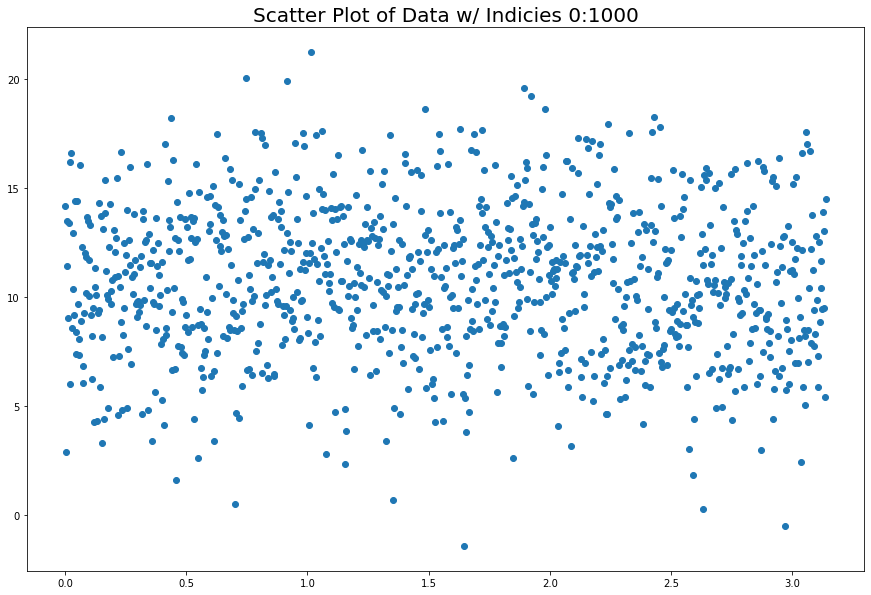

In [13]:
plt.scatter(t[0:1000], bkgd[0:1000])
plt.title(f'Scatter Plot of Data w/ Indicies {0}:{1000}', size = 20)

1b) Generalize your code so you can make a plot of any X contiguous points (e.g. 2000 points starting at point 500), and produce an example plot of a set of data somethere in the middle of your array.

In [19]:
def plot_some_data(minidx, maxidx):
    plt.scatter(t[minidx:maxidx], bkgd[minidx:maxidx])
    plt.title(f'Scatter Plot of Data w/ Indicies {minidx}:{maxidx}', size = 20)

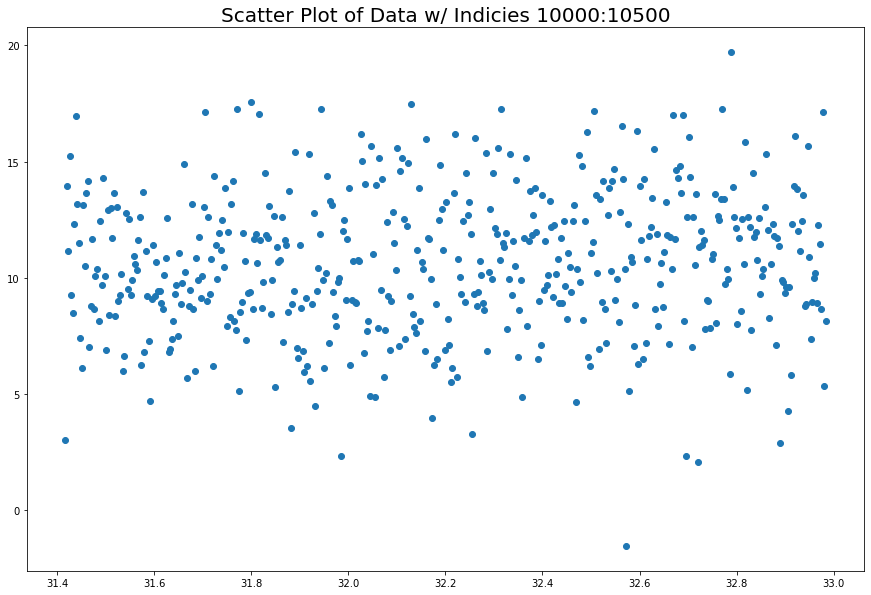

In [20]:
plot_some_data(10000,10500)

1c) Sometimes you want to sample the data, such as plotting every 100th point. Make a plot of the full data range, but only every 100th point.

Text(0.5, 1.0, 'Scatter Plot of Data w/ Every 100th Point')

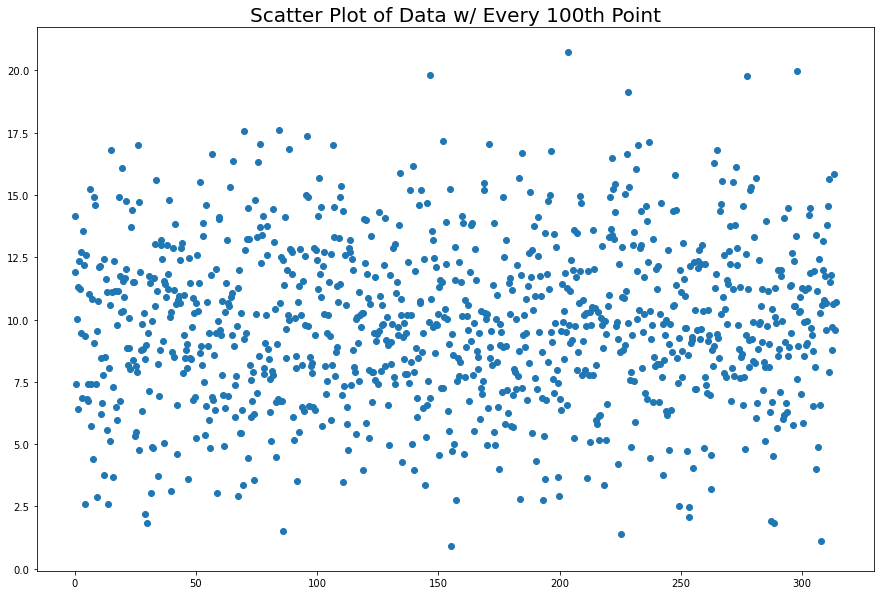

In [21]:
plt.scatter(t[::100], bkgd[::100])
plt.title(f'Scatter Plot of Data w/ Every 100th Point', size = 20)

### Problem 2: density

Now you can make a scatter plot of just a 100,000 points, so you might try it to see what it looks like. But particularly in the central areas the points all overlap into just a blob, and this just gets worse as the number of points goes up. What is better is to plot the density of the points. There are several ways of doing this, but a 2D histogram plot is the easiest (plt.hist2d() in python and histogram2() in MatLab).

2a) Make a 2d histogram plot. Read about options, and play with binsize so it is useful (too large a bin and everything washes out, too small and the sample noise dominates). Make sure you use a colorbar.

''

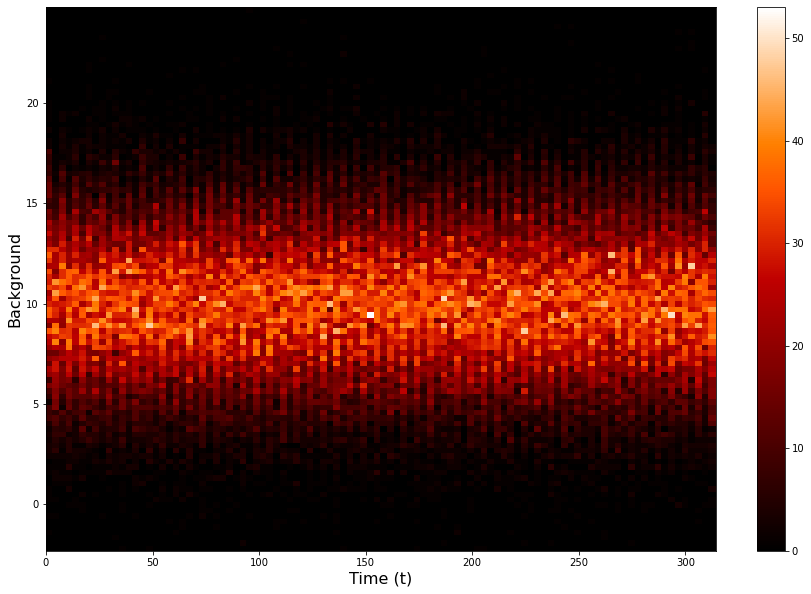

In [52]:
plt.hist2d(t, bkgd, bins = (100,100), cmap = 'gist_heat')
plt.xlabel('Time (t)', size = 16)
plt.ylabel('Background', size = 16)
plt.title
plt.colorbar()
;

2b) Clearly explain what is being plotted in your plot (e.g. what does each color mean?)

This plot is a 2D histogram of the background vs time generated in problem zero. The x-axis shows the value of time and the y-axis shows the background values. The colorbar indicates the number of points in each bin where black is zero and white corresponds to about 52 points in that bin.

### Problem 3: folding

Now if you have a periodic signal, it is possible to fold the data stream at that period to make the pattern clearer.

3a) Make an new time variable that folds at a period of  2𝜋  (the modulo operator is your friend, variably expressed as mod(), %, or rem()). Then make a scatter plot of all your data, but now folded. (Reminder, for more data you'd never actually want to plot all the points.)

3b) Make a 2D histogram plot of your folded data.

In [56]:
t_mod = t % (2*np.pi)

''

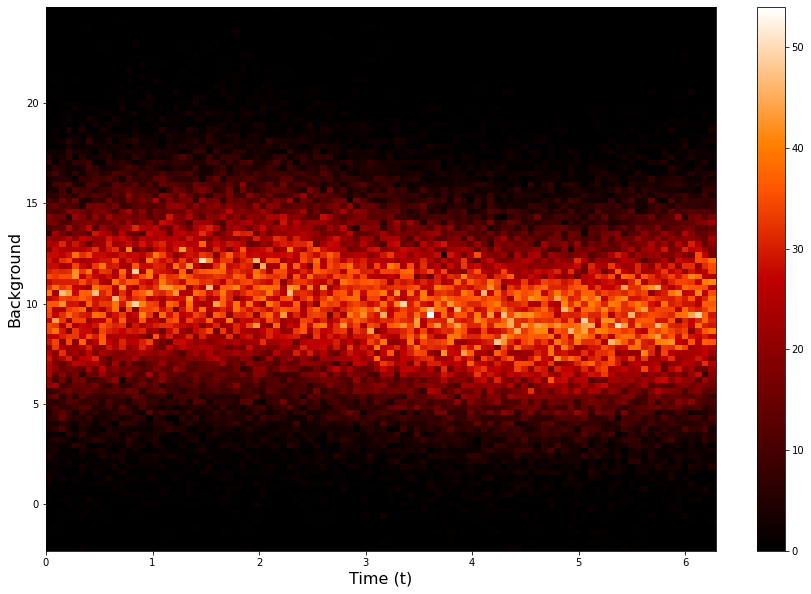

In [59]:
h, xedges, yedges, image = plt.hist2d(t_mod, bkgd, bins = (100,100), cmap = 'gist_heat')
plt.xlabel('Time (t)', size = 16)
plt.ylabel('Background', size = 16)
plt.title
plt.colorbar()
;